شرحًا مبسّطًا وواضحًا لبيانات **Cleveland Heart Disease**:

---

## 🩺 المتغيّرات (Features)

المجموعة التي نستخدمها تتضمن 14 عمودًا كما يلي:

* **age**: العمر بالسنوات (عدد صحيح)
* **sex**: الجنس (1 = ذكر، 0 = أنثى)
* **cp**: نوع ألم الصدر:

  * 1 = صدري نموذجي (typical angina)
  * 2 = صدري غير نموذجي
  * 3 = ألم غير صدري
  * 4 = عديم الأعراض
* **trestbps**: ضغط الدم عند الراحة (مم زئبق)
* **chol**: الكوليسترول بالدم (مم/دل)
* **fbs**: سكر الصيام (>120 mg/dl؟)، 1 = نعم، 0 = لا
* **restecg**: نتائج تخطيط القلب الراحة:

  * 0 = طبيعي
  * 1 = تشوهات ST-T
  * 2 = تضخّم في البطين الأيسر
* **thalach**: أقصى معدّل لضربات القلب أثناء التمرين
* **exang**: هل ظهر الذبحة عند التمرين؟ (1 = نعم، 0 = لا)
* **oldpeak**: انخفاض ST مُحرّض بالتمرين مقارنة بالراحة
* **slope**: ميل مقطع ST الذروي:

  * 1 = مرتفع
  * 2 = مسطّح
  * 3 = منخفض
* **ca**: عدد الأوعية الدموية الرئيسية (0–3) بيُرى بالتصوير بالأشعة
* **thal**: نتيجة اختبار الثاليوم:

  * 3 = طبيعي
  * 6 = عيب ثابت
  * 7 = عيب قابل للتصحيح
* **num**: المتغيّر الهدف (target) – تشخيص المرض

---

## 🎯 المتغيّر الهدف (Target: num)

* **0**: لا يوجد مرض قلبي (أوعية ضيقة أقل من 50%)
* **1–4**: وجود مرض قلبي بدرجات متفاوتة من الشدة ([archive.ics.uci.edu][1], [rdrr.io][2], [medium.com][3])

**ملاحظة مهمة:** أغلب الدراسات تُحوّل القيم (1، 2، 3، 4) إلى تصنيف واحد “مريض” مقارنة بـ “سليم” (0)، وبهذا تتحوّل المهمة إلى **تصنيف ثنائي** (binary classification) .

---

## ✅ الخلاصة:

* **في كل سجل (row)**، لدينا خصائص سريرية وديموغرافية للمريض.
* **المتغيّر الهدف**:

  * “0” → سليم
  * “1 إلى 4” → مريض (أي وجود مرض قلبي)
* في التحليل غالبًا نقوم بتحويل `num` إلى متغير ثنائي: 0 = سليم، 1 = مريض.

---


[1]: https://archive.ics.uci.edu/dataset/45/heart%2Bdisease?utm_source=chatgpt.com "Heart Disease - UCI Machine Learning Repository"
[2]: https://rdrr.io/cran/MixAll/man/HeartDisease.html?utm_source=chatgpt.com "HeartDisease: Mixed data : Cleveland Heart Disease Data in MixAll"
[3]: https://medium.com/analytics-vidhya/cleveland-eda-b73f0f62ebf8?utm_source=chatgpt.com "‍ Heart Disease Dataset [Cleveland] — EDA | Analytics Vidhya"


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


# Data Preprocessing & Cleaning 

# 1.Combine 4 files of data 

In [115]:
# Common column names
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# File URLs
base_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/"
files = {
    "cleveland": "processed.cleveland.data",
    "hungarian": "processed.hungarian.data",
    "switzerland": "processed.switzerland.data",
    "va": "processed.va.data"
}

# Load and clean all files
df_list = []
for source, filename in files.items():
    df = pd.read_csv(base_url + filename, names=columns)
    df["source"] = source
    df_list.append(df)

# Combine datasets
df_combined = pd.concat(df_list, ignore_index=True)

# Replace missing values
df_combined.replace("?", np.nan, inplace=True)

# Convert numerical columns
df_combined["ca"] = pd.to_numeric(df_combined["ca"], errors="coerce")
df_combined["thal"] = pd.to_numeric(df_combined["thal"], errors="coerce")
df_combined["target"] = pd.to_numeric(df_combined["target"], errors="coerce")

# Drop rows with missing values (or impute later)
#df_combined.dropna(inplace=True)

# Reset index
df_combined.reset_index(drop=True, inplace=True)

# Show shape and preview
print("Shape after merging and cleaning:", df_combined.shape)
df_combined.head()


Shape after merging and cleaning: (920, 15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland


In [117]:
df=df_combined
df.describe()

,age,sex,cp,ca,thal,target
count,920.000000,920.000000,920.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,3.000000,7.000000,4.000000


In [118]:
# احفظ نسخة من البيانات الجاهزة بعد المعالجة
df.to_csv("data1.csv", index=False)

In [71]:
df.shape

(920, 15)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    object 
 4   chol      890 non-null    object 
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalach   865 non-null    object 
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    object 
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(5), int64(1), object(9)
memory usage: 107.9+ KB


| نوع العمود                                             | استخدم                       | السبب                                                          |
| ------------------------------------------------------ | ---------------------------- | -------------------------------------------------------------- |
| **رقمي عددي (مثلاً age, chol)**                        | `mean` أو `median`           | لو البيانات فيها outliers استخدم `median`، غير كده `mean` كويس |
| **فئوي (categorical) مشفر بأرقام (مثل sex, cp, thal)** | `mode`                       | لأن القيم بتمثل فئات مش أرقام حسابية                           |
| **نصوص أو سلاسل**                                      | `mode` أو تخزين كـ "unknown" | لأن ماينفعش ناخد متوسط حروف أو نصوص                            |


In [73]:
# Impute missing values (mean/median/mode)
df_combined["ca"].fillna(df_combined["ca"].median(), inplace=True)
df_combined["thal"].fillna(df_combined["thal"].mode()[0], inplace=True)



## ⚖️ ثانيًا: شرح MinMaxScaler و StandardScaler

### 🎯 ليه بنستخدم الـ **Scaling** أصلًا؟

لما تستخدم خوارزميات ML زي:

* **Logistic Regression**
* **KNN**
* **SVM**
* **Neural Networks**

كلها **حساسة لحجم القيم الرقمية**، يعني:

* عمود زي `chol` (قيم من 120 لـ 400)
* وعمود زي `fbs` (قيمه 0 أو 1)

الخوارزمية حتهتم أكثر بالعمود اللي فيه أرقام كبيرة، حتى لو مش أكثر أهمية!

---

## 🔧 أدوات التقييس (Scaling Tools)

### 1. **StandardScaler**

* **يحول البيانات إلى**:

  * **متوسط = 0**
  * **انحراف معياري = 1**
* المعادلة:

  $$
  z = \frac{(x - \mu)}{\sigma}
  $$

  حيث:

  * $x$: القيمة الأصلية
  * $\mu$: المتوسط
  * $\sigma$: الانحراف المعياري

> ➕ جيد لما البيانات بتكون موزعة توزيع طبيعي (Gaussian)

---

### 2. **MinMaxScaler**

* يحول البيانات إلى **مدى بين 0 و 1**
* المعادلة:

  $$
  x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
  $$

> ➕ مفيد جدًا في:

* **نموذج KNN**
* **الشبكات العصبية**
* البيانات اللي مش شرط تكون موزعة طبيعي

---

## 🆚 مقارنة سريعة:

| الخاصية              | StandardScaler | MinMaxScaler                    |
| -------------------- | -------------- | ------------------------------- |
| النطاق               | -∞ إلى ∞       | دائمًا من 0 إلى 1               |
| التأثير على outliers | أقل حساسية     | أكثر تأثرًا                     |
| مناسب لـ             | توزيع طبيعي    | أي توزيع (خاصة الشبكات العصبية) |

---

## 📌 طيب، تستخدم أنهي في مشروعك؟

### ⬅ في حالتك:

* البيانات ليست موزعة طبيعي
* ستستخدم خوارزميات مثل:

  * **SVM, Logistic Regression, KMeans, Neural Networks**

إذن الأفضل غالبًا:

```python
scaler = StandardScaler()  # ✅ ممتاز كبداية
# أو:
# scaler = MinMaxScaler()  # لو عاوز تستخدم KNN أو Neural Net

# ثم:
df_combined[numeric_cols] = scaler.fit_transform(df_combined[numeric_cols])
```

---

## ✅ خلاصة:

| النقطة             | التوضيح                                 |
| ------------------ | --------------------------------------- |
| **imputation**     | تعويض القيم المفقودة بدل ما نحذف الصفوف |
| **mode**           | للفئات (Categorical)                    |
| **median**         | للبيانات الرقمية مع outliers            |
| **StandardScaler** | يعطي توزيع قياسي (0 mean, 1 std)        |
| **MinMaxScaler**   | يحصر البيانات بين 0 و 1                 |

In [90]:
from sklearn.preprocessing import StandardScaler

# Define numeric columns (excluding target)
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

# Initialize scaler
scaler = StandardScaler()

# Fit-transform
df_combined[numeric_cols] = scaler.fit_transform(df_combined[numeric_cols])


# 2.One-Hot Encoding
لأن مثلًا العمود cp (نوع ألم الصدر):

القيم: 0، 1، 2، 3 → مش أرقام حقيقية بل فئات

النتيجة: الأعمدة الفئوية هتتحول إلى أعمدة 0/1

In [91]:
categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

df_encoded = pd.get_dummies(df_combined, columns=categorical_cols, drop_first=True, dtype=int)

df_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,source,sex_1.0,cp_2.0,...,exang_1.0,exang_0,exang_1,slope_2.0,slope_3.0,slope_1,slope_2,slope_3,thal_6.0,thal_7.0
0,1.007386,0.675287,0.305908,0.480653,1.303159,-0.724064,0,cleveland,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1.432034,1.462483,0.784599,-1.140262,0.569611,2.487454,2,cleveland,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1.432034,-0.636705,0.269780,-0.329805,1.578239,1.416948,1,cleveland,1,0,...,1,0,0,1,0,0,0,0,0,1
3,-1.752828,-0.111908,0.459450,1.908602,2.403480,-0.724064,0,cleveland,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.328180,-0.111908,0.043982,1.329704,0.477918,-0.724064,0,cleveland,0,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
#تحويل التارجت إلى 0 و 1
# Convert target to binary classification
df_encoded["target"] = df_encoded["target"].apply(lambda x: 1 if x > 0 else 0)


# 3.Exploratory Data Analysis (EDA)

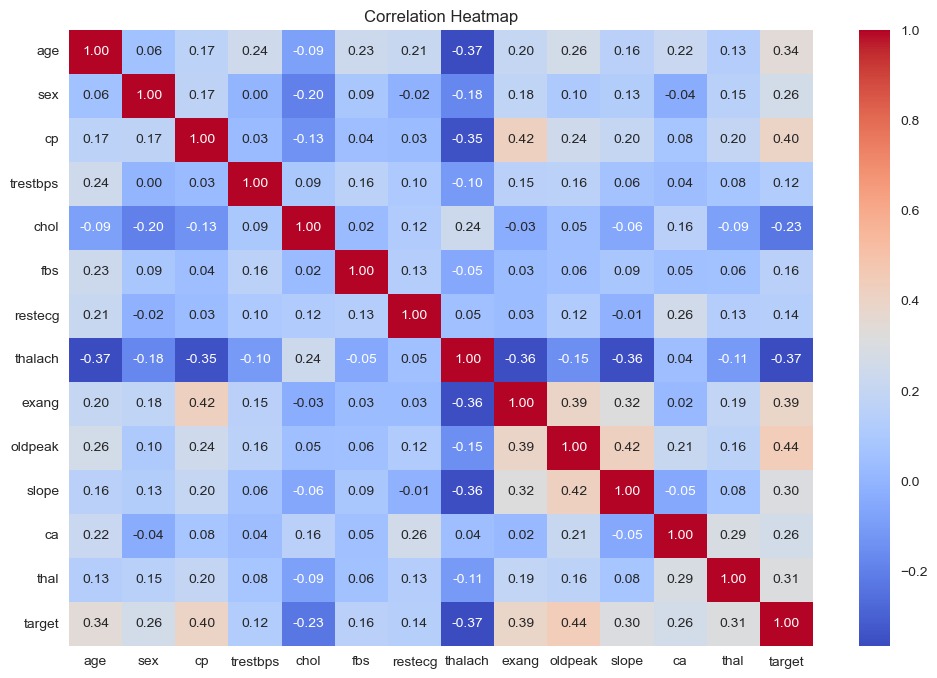

In [77]:
df = df_combined.drop(columns=['source'])
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


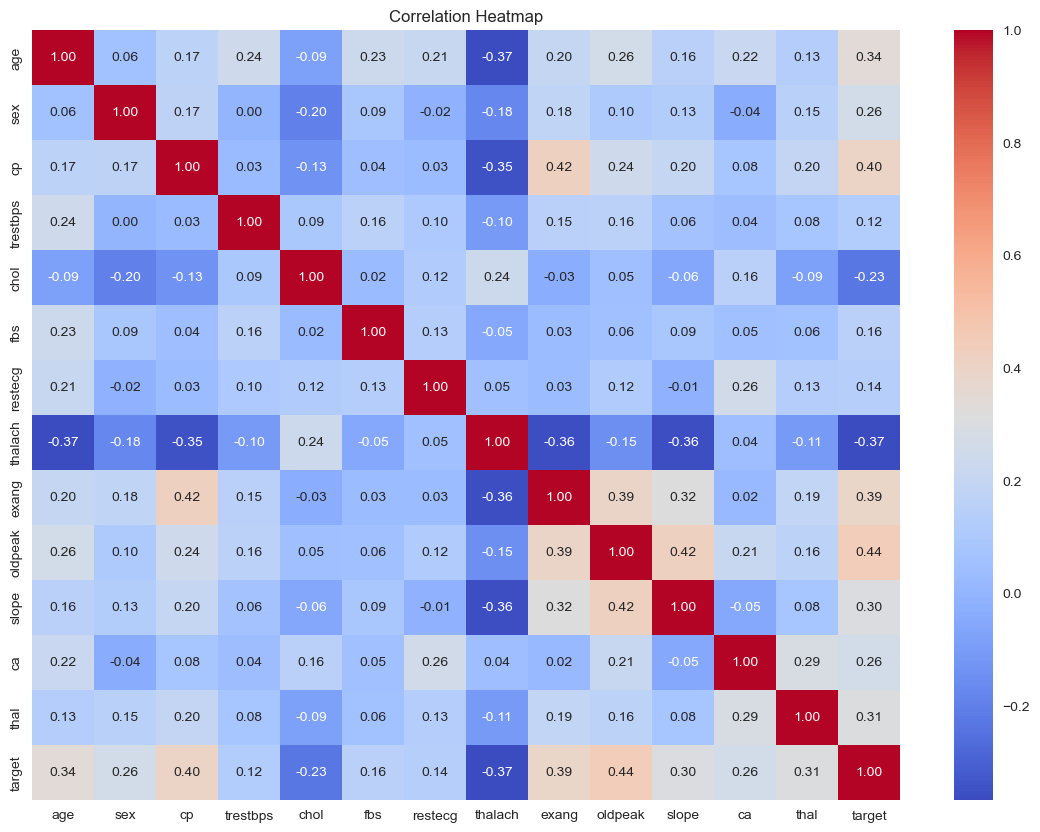

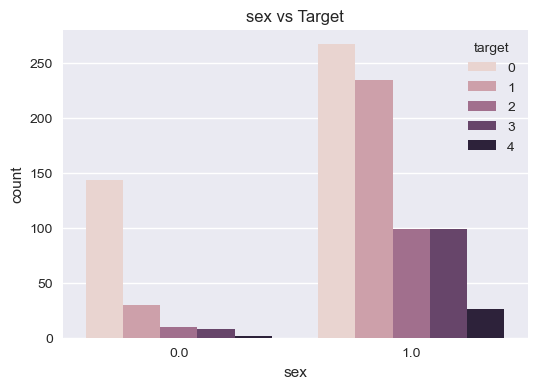

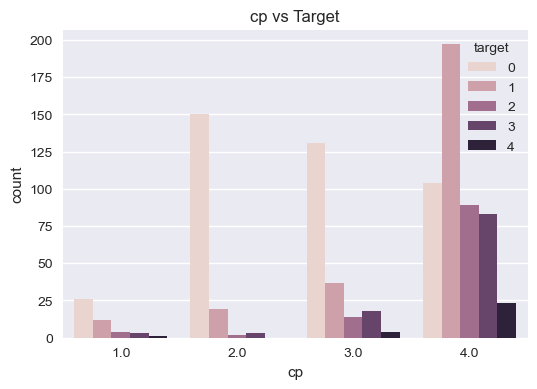

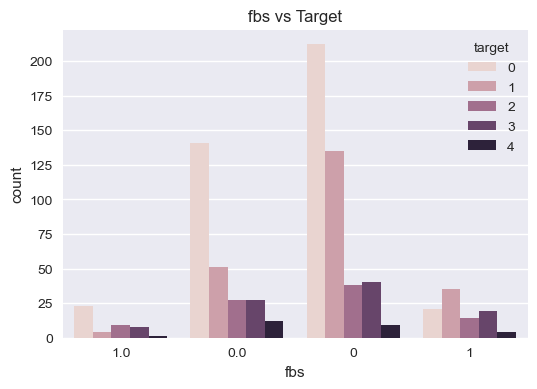

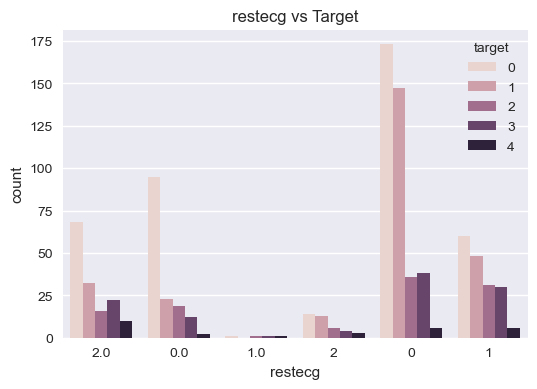

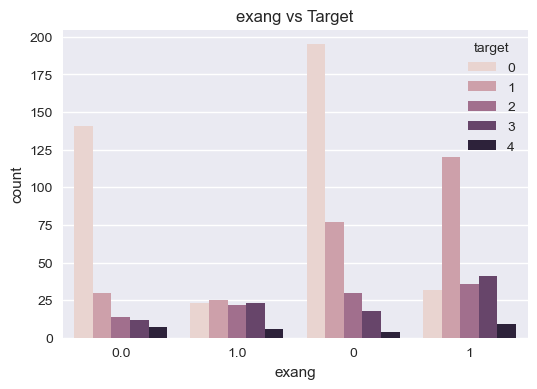

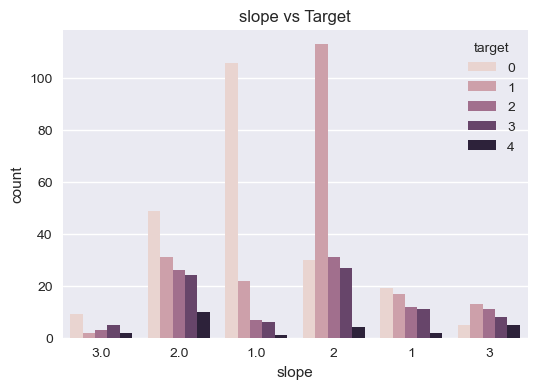

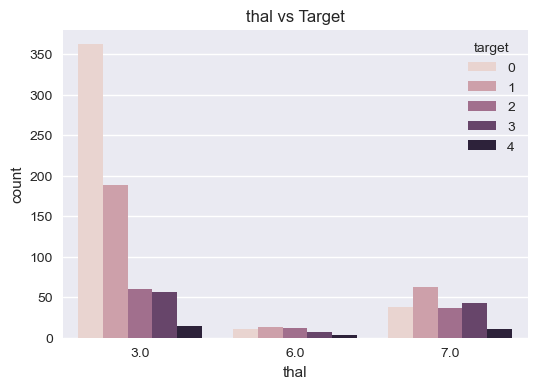

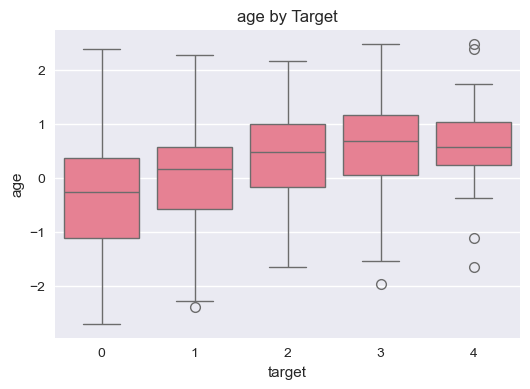

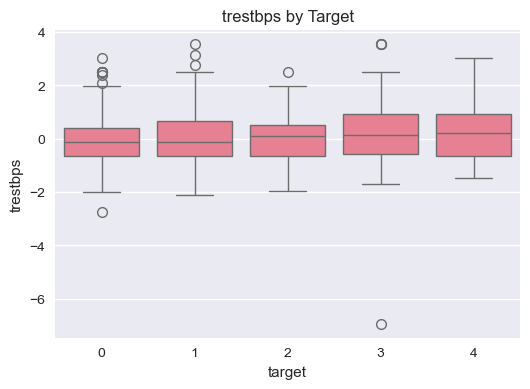

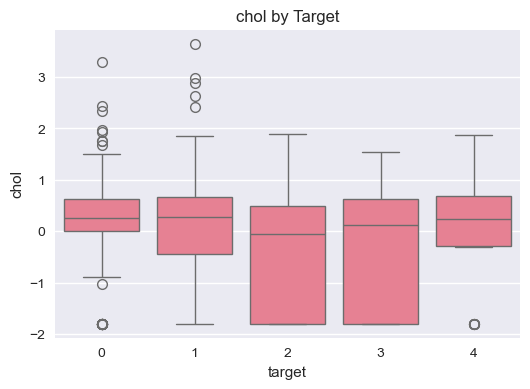

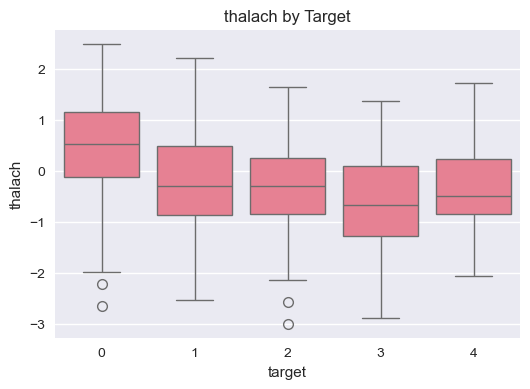

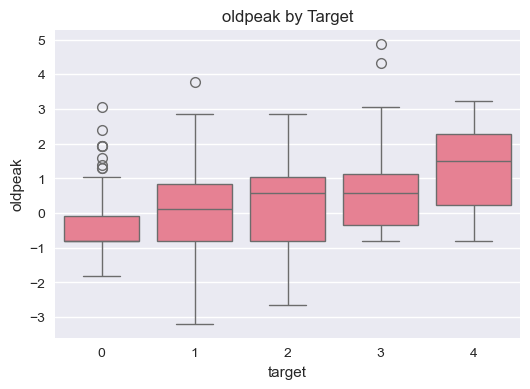

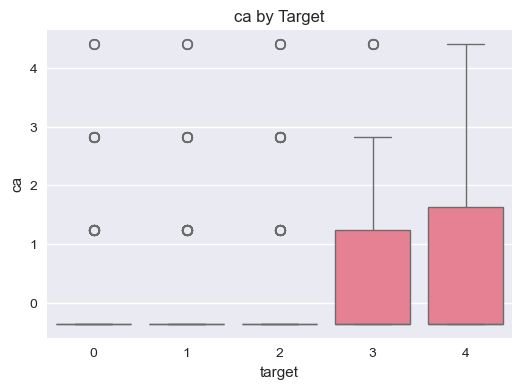

In [80]:
# === EDA ===
import matplotlib.pyplot as plt
import seaborn as sns



# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Count plots for categorical features
categorical_plot_cols = [col for col in df.columns if col in ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]]
for col in categorical_plot_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="target", data=df)
    plt.title(f"{col} vs Target")
    plt.show()

# Boxplots for numeric features
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} by Target")
    plt.show()


# 4.2.2 Dimensionality Reduction - PCA (Principal Component Analysis) 

In [83]:
# Check if any missing values remain
print("Missing values:", df_encoded.isnull().sum().sum())


Missing values: 206


In [93]:
df_encoded.isnull().sum()[df_encoded.isnull().sum() > 0]


trestbps     59
chol         30
thalach      55
oldpeak      62
ca          611
dtype: int64

In [94]:
from sklearn.impute import SimpleImputer

# حدد الأعمدة اللي فيها قيم ناقصة
missing_cols = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# استخدم Imputer للتعويض
imputer = SimpleImputer(strategy='median')  # median أكثر أمانًا في وجود outliers

df_encoded[missing_cols] = imputer.fit_transform(df_encoded[missing_cols])


In [95]:
print("Remaining NaNs:", df_encoded.isnull().sum().sum())  # لازم يطبع 0


Remaining NaNs: 0


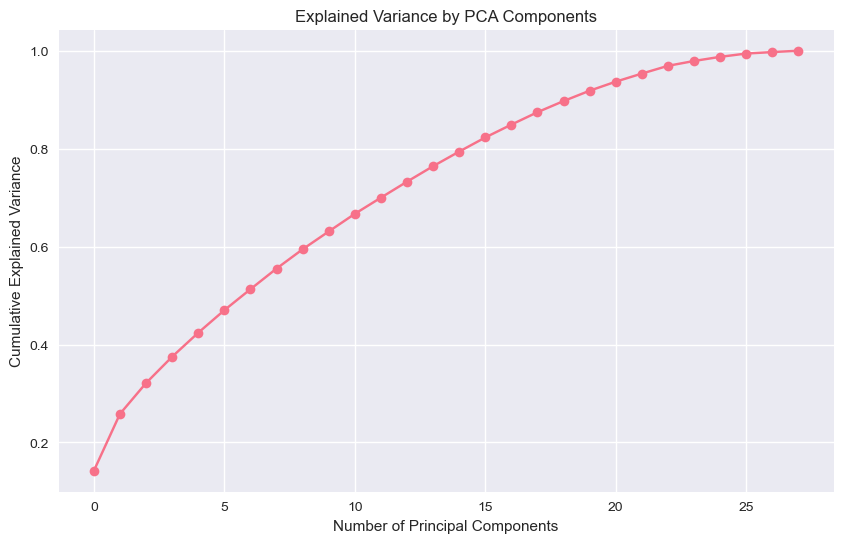

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# نفصل الـ X والـ y
X = df_encoded.drop(["target", "source"], axis=1)
y = df_encoded["target"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# رسم نسبة التباين التراكمية
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()


# 5.Feature Selection

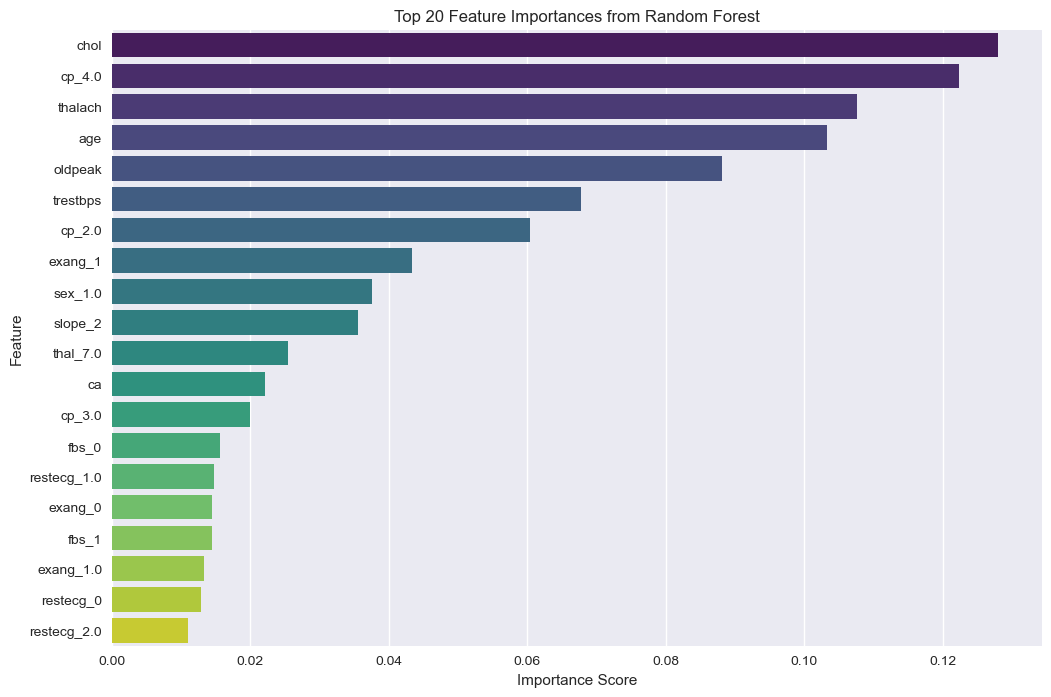

In [97]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# فصل البيانات
X = df_encoded.drop(["target", "source"], axis=1)
y = df_encoded["target"]

# نموذج Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# رسم الأهمية
importances = model.feature_importances_
features = X.columns

# عرض النتائج
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20], palette='viridis')
plt.title("Top 20 Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [98]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# نموذج RFE
estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator=estimator, n_features_to_select=10)
selector.fit(X, y)

# المميزات المختارة
selected_rfe_features = X.columns[selector.support_]
print("RFE selected features:")
print(selected_rfe_features)


RFE selected features:
Index(['ca', 'sex_1.0', 'cp_2.0', 'cp_4.0', 'fbs_1', 'exang_1', 'slope_1',
       'slope_2', 'slope_3', 'thal_7.0'],
      dtype='object')


In [100]:
from sklearn.feature_selection import SelectKBest, chi2

# خد فقط الأعمدة اللي نوعها 0 أو 1
X_chi = df_encoded.drop(["target", "source"], axis=1)

# احتفظ فقط بالأعمدة اللي كلها غير سالبة (>= 0)
X_chi = X_chi.loc[:, (X_chi >= 0).all()]

# تأكد إن كلها أعداد صحيحة
X_chi = X_chi.astype(int)

# Apply chi-square
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(X_chi, df_encoded["target"])

selected_features = X_chi.columns[selector.get_support()]
print("Chi-Square Selected Features:\n", selected_features)


Chi-Square Selected Features:
 Index(['sex_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_1', 'exang_1.0',
       'exang_0', 'exang_1', 'slope_2', 'thal_7.0'],
      dtype='object')


# 6.Train /split the data

# Supervised Learning 

In [101]:
from sklearn.model_selection import train_test_split

# استخدام كل المميزات (أو يمكنك اختيار أهم 10 من أي طريقة)
X = df_encoded.drop(['target', 'source'], axis=1)
y = df_encoded['target']

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (736, 28)
Test shape: (184, 28)


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# النماذج
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# تخزين النتائج
fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    print(f"{name} trained.")


Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
SVM trained.


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# نتائج التقييم
for name, model in fitted_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("AUC Score:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\n")


===== Logistic Regression =====
Accuracy: 0.8152173913043478
Precision: 0.8148148148148148
Recall: 0.8627450980392157
F1-score: 0.8380952380952381
AUC Score: 0.9024390243902439

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.78        82
           1       0.81      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



===== Decision Tree =====
Accuracy: 0.7336956521739131
Precision: 0.7572815533980582
Recall: 0.7647058823529411
F1-score: 0.7609756097560976
AUC Score: 0.7299139167862266

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        82
           1       0.76      0.76      0.76       102

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
w

| النموذج                 | Accuracy    | Recall     | AUC        | ملاحظات                              |
| ----------------------- | ----------- | ---------- | ---------- | ------------------------------------ |
| **Logistic Regression** | 81.5%       | ✅ **0.86** | 0.90       | أداء قوي، خطي، وسهل الفهم            |
| **Decision Tree**       | 73.3%       | 0.76       | ❌ **0.73** | أضعف أداء، غالبًا Overfitting        |
| **Random Forest**       | ✅ **84.2%** | ✅ 0.86     | ✅ 0.92     | **أفضل أداء إجمالي**                 |
| **SVM**                 | ✅ **84.2%** | ✅ **0.89** | ✅ 0.92     | ممتاز، لكنه أبطأ وأقل قابلية للتفسير |


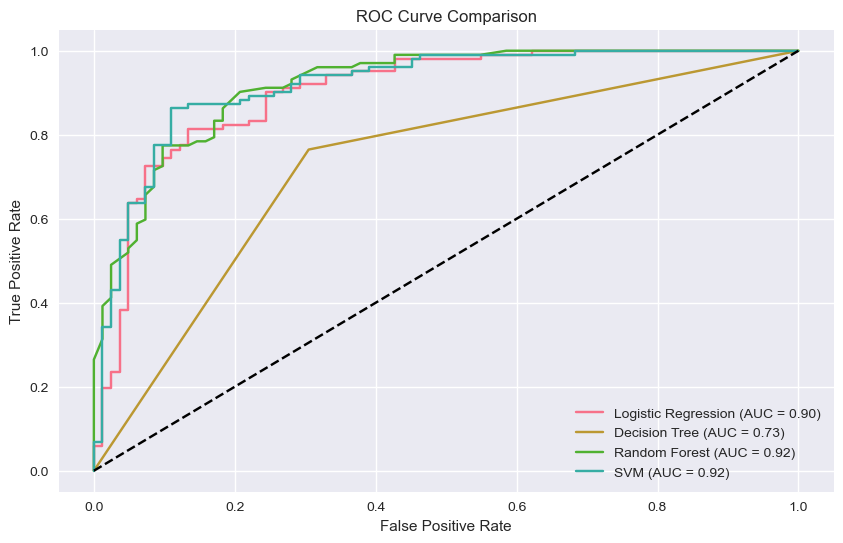

In [104]:
plt.figure(figsize=(10, 6))

for name, model in fitted_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


# 7.Unsupervised Learning – Clustering


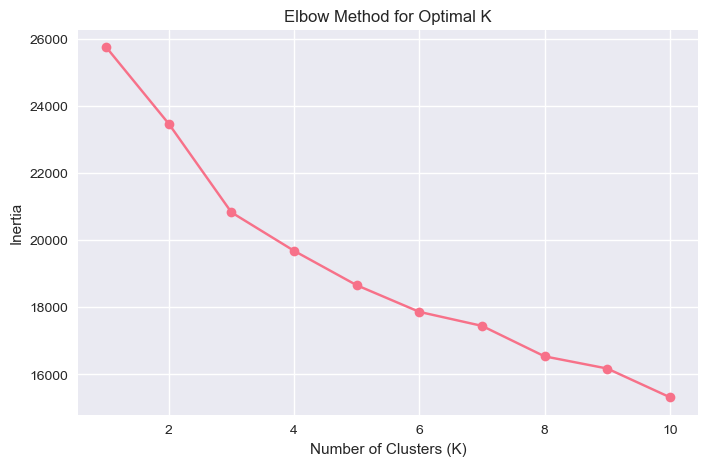

In [106]:
#1. K-Means Clustering (with Elbow Method)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# نستخدم فقط الخصائص بدون target
X_clust = df_encoded.drop(['target', 'source'], axis=1)

# نعيد التقييس
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

# Elbow method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [107]:
#Apply KMeans + Compare to Actual Labe
# أفضل عدد K بناءً على Elbow curve
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# إضافة الكلاستر للبيانات
df_clustered = df_encoded.copy()
df_clustered["kmeans_cluster"] = kmeans_labels

# مقارنة الكلاستر بـ target الحقيقي
pd.crosstab(df_clustered["target"], df_clustered["kmeans_cluster"], margins=True)


kmeans_cluster,0,1,All
target,,,
0,249,162,411
1,119,390,509
All,368,552,920


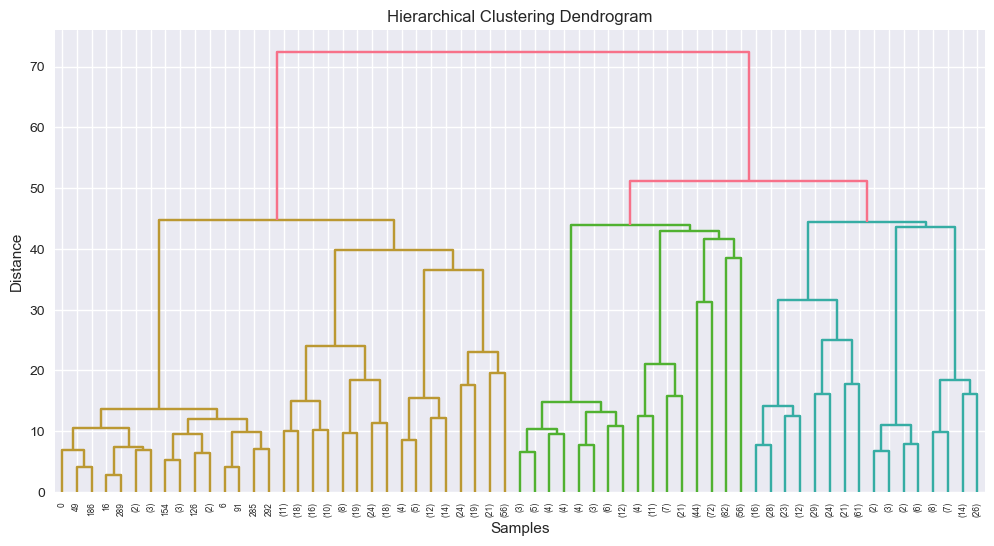

In [108]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12, 6))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


# 8.Hyperparameter Tuning – GridSearch & RandomizedSearch
نطبقها على أفضل نموذج عندك (مثل Random Forest):

🔹 GridSearchCV – على Random Forest

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# تقييمه
y_pred = best_model.predict(X_test)
print("Optimized F1-score:", f1_score(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimized F1-score: 0.8530805687203792


In [110]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(3, 15)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist, n_iter=20,
                                   cv=5, scoring='f1', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters from RandomizedSearch:", random_search.best_params_)


Best Parameters from RandomizedSearch: {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 57}


# 9.Model Export & Deployment

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

# إعداد pipeline
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)  # ده اللي طلع من GridSearch أو RandomizedSearch
])

# تدريب الـ pipeline
final_pipeline.fit(X_train, y_train)

# حفظه
joblib.dump(final_pipeline, "heart_disease_pipeline.pkl")
print("✅ Pipeline saved as 'heart_disease_pipeline.pkl'")


✅ Pipeline saved as 'heart_disease_pipeline.pkl'


In [112]:
import joblib
joblib.dump(X.columns.tolist(), "columns.pkl")


['columns.pkl']

In [113]:
# استخدم أفضل موديل (بعد GridSearch أو RandomSearch)
from sklearn.ensemble import RandomForestClassifier
import joblib

# درّب موديل بدون pipeline (مباشر)
simple_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)
simple_model.fit(X_train, y_train)

# حفظه
joblib.dump(simple_model, "heart_disease_model_only.pkl")
print("✅ Simple model saved as 'heart_disease_model_only.pkl'")


✅ Simple model saved as 'heart_disease_model_only.pkl'


In [114]:
# احفظ نسخة من البيانات الجاهزة بعد المعالجة
df_encoded.to_csv("data.csv", index=False)
